In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [40]:
import warnings
warnings.filterwarnings("ignore")

## Exploring the Data

In [41]:
df = pd.read_csv('car data.csv')

In [42]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [43]:
df.shape

(301, 9)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [45]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [46]:
## Checking if there is null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [47]:
## Counting the values for Fuel type,Seller Type and Transmission
print(df['Fuel_Type'].value_counts())
print(df['Seller_Type'].value_counts())
print(df['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


## Visulaize the Data

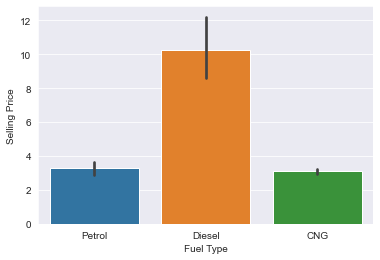

In [48]:
sns.barplot(df['Fuel_Type'],df['Selling_Price'])
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

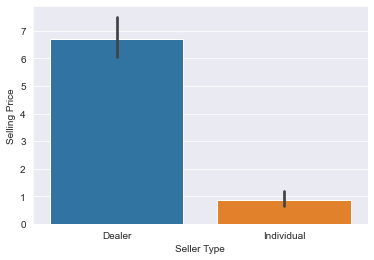

In [49]:
sns.barplot(df['Seller_Type'],df['Selling_Price'])
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.show()

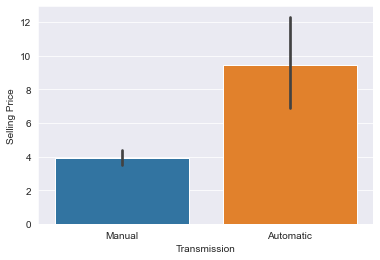

In [50]:
sns.barplot(df['Transmission'],df['Selling_Price'])
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.show()

In [51]:
## Changing Fuel type to int Dtype
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [52]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0


In [53]:
## Data manipulation for Seller Type and Transmission
df = pd.get_dummies(df,columns=['Seller_Type','Transmission'],drop_first=True)

In [54]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


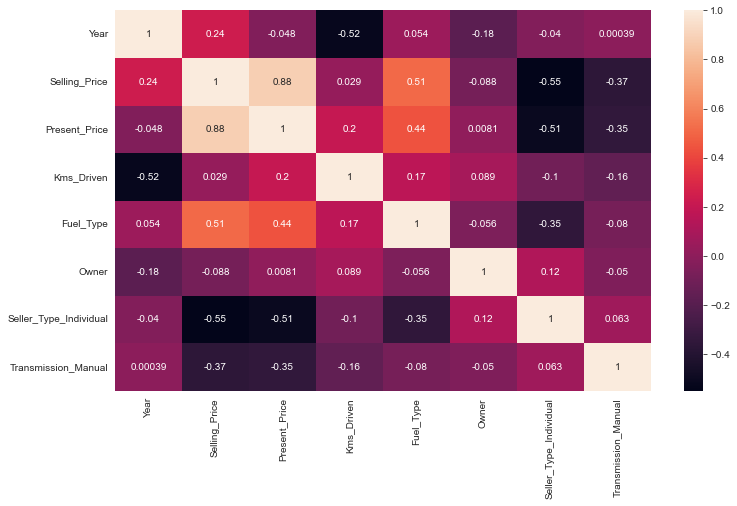

In [55]:
## Checking the correlations between columns
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

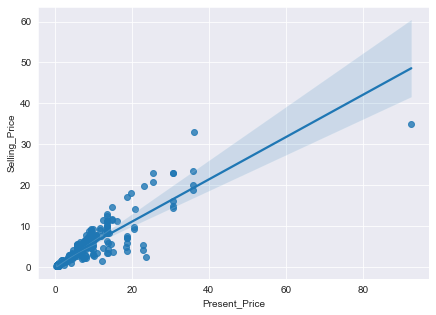

In [56]:
fig = plt.figure(figsize=(7,5))
sns.regplot('Present_Price','Selling_Price',df)

## Splitting the Data for train and test sets

In [69]:
## Dropping unnecessary columns for X
X = df.drop(['Car_Name','Selling_Price'],axis = 1)
y = df['Selling_Price']

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=0)

In [71]:
## preprocessing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
X_train

array([[0.85714286, 0.05169051, 0.07007007, ..., 0.        , 0.        ,
        1.        ],
       [0.78571429, 0.00530993, 0.08308308, ..., 0.        , 1.        ,
        1.        ],
       [0.85714286, 0.0704378 , 0.06191592, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.85714286, 0.0171218 , 0.02702703, ..., 0.        , 1.        ,
        1.        ],
       [0.21428571, 0.04150412, 0.12912913, ..., 0.        , 0.        ,
        1.        ],
       [0.78571429, 0.00346771, 0.02642643, ..., 0.        , 1.        ,
        1.        ]])

## Linear Regression model

In [73]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [74]:
lm.fit(X_train,y_train)

LinearRegression()

In [75]:
lm.coef_

array([ 5.39480211, 37.51925647, -2.43002202,  3.07879935, -2.80804178,
       -1.4163794 , -1.36449403])

In [76]:
lm.intercept_

-0.9623558240906425

In [77]:
pred_test = lm.predict(X_test)

<AxesSubplot:ylabel='Selling_Price'>

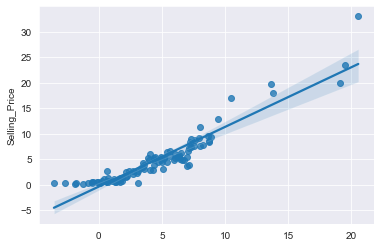

In [78]:
sns.regplot(pred_test,y_test)

## Accuracy of the model

In [79]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test,pred_test))
print('MSE: ',metrics.mean_squared_error(y_test,pred_test))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,pred_test)))

MAE:  1.2060168467806185
MSE:  4.149496061222427
RMSE:  2.037031188082899


In [80]:
from sklearn.metrics import r2_score
print("Accuracy: {:.2f}%".format(r2_score(y_test, pred_test)*100))

Accuracy: 85.24%
